In [221]:
##how many columns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from datetime import datetime

fh = 'train.csv'
df = pd.read_csv(fh)

print(len(df.columns))

12


In [222]:
##how many rows
print(len(df))

10886


In [223]:
##what are the datatype
print(df.dtypes)

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


In [224]:
##Are there missing values in each columns
df.isnull().sum()
##no missing value in each column


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<Container object of 24 artists>

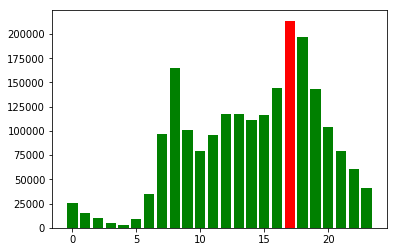

In [229]:
%matplotlib inline
##What hour of a day are bikes rented most?
def get_hour(datetime):
    return datetime.hour

df.datetime = pd.to_datetime(df.datetime)

df['hour'] = df['datetime'].apply(get_hour)

result = df['count'].groupby(df['hour']).sum()
result = result.reset_index().set_index('hour')

t1 = result[result==result.max()]
t2 = result[result<result.max()]

plt.bar(t1.index, t1['count'], color='r')
plt.bar(t2.index, t2['count'], color='g')


#langs =    result.index
#langperf = result 
#y_pos = np.arange(len(langs))

#plt.bar(y_pos, langperf, align='center', alpha=0.5)
#plt.xticks(y_pos, langs)
##plt.ylabel('Usage')
#plt.title('complaints_per_year')
#plt.savefig('complaints_per_year.png')
   

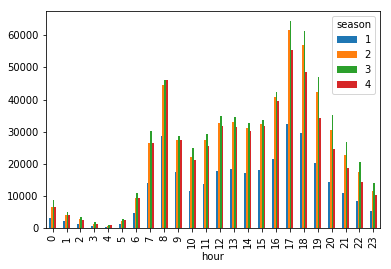

In [230]:
%matplotlib inline
#At what season and what hour of a day are bikes rented most?
result_season_hour = df.groupby([df['hour'],df['season']]).sum()['count'].to_frame()



data = result_season_hour['count']

data.unstack().plot(kind='bar', stacked=False)
       
        
#plt.bar(result_season_hour.index, result_season_hour.index.values)

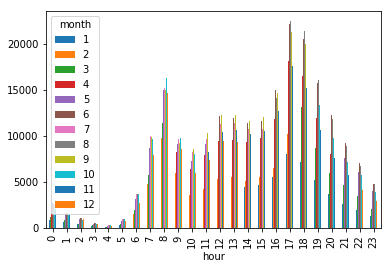

In [231]:
%matplotlib inline
##At which month and what hour of a day are bikes rented most?

def get_month(datetime):
    return datetime.month

df['month'] = df['datetime'].apply(get_month)

result_month_hour = df.groupby([df['hour'],df['month']]).sum()['count']


result_month_hour.unstack().plot(kind='bar', stacked=False)


<Container object of 455 artists>

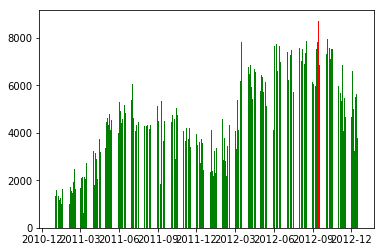

In [232]:
%matplotlib inline
#Which date have the most rented bikes in the dataset?

def get_date(datetime):
    return datetime.date()
df['date'] = df['datetime'].apply(get_date)
result = df.groupby(df['date']).sum()['count']

t1 = result[result==result.max()]
t2 = result[result<result.max()]

plt.bar(t1.index, t1, color='r')
plt.bar(t2.index, t2, color='g')

